In [499]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split,GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
from sklearn.metrics import classification_report,plot_confusion_matrix,roc_curve,auc
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pickle
import json
import warnings
warnings.filterwarnings("ignore")

# Problem Statement :

# Data Gathering

In [693]:
df = pd.read_csv("fraud_claims_data.csv")
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


# Exploratory Data Analysis

In [694]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [695]:
df.isna().sum()           # Checking for missing value

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [696]:
df.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


<AxesSubplot:>

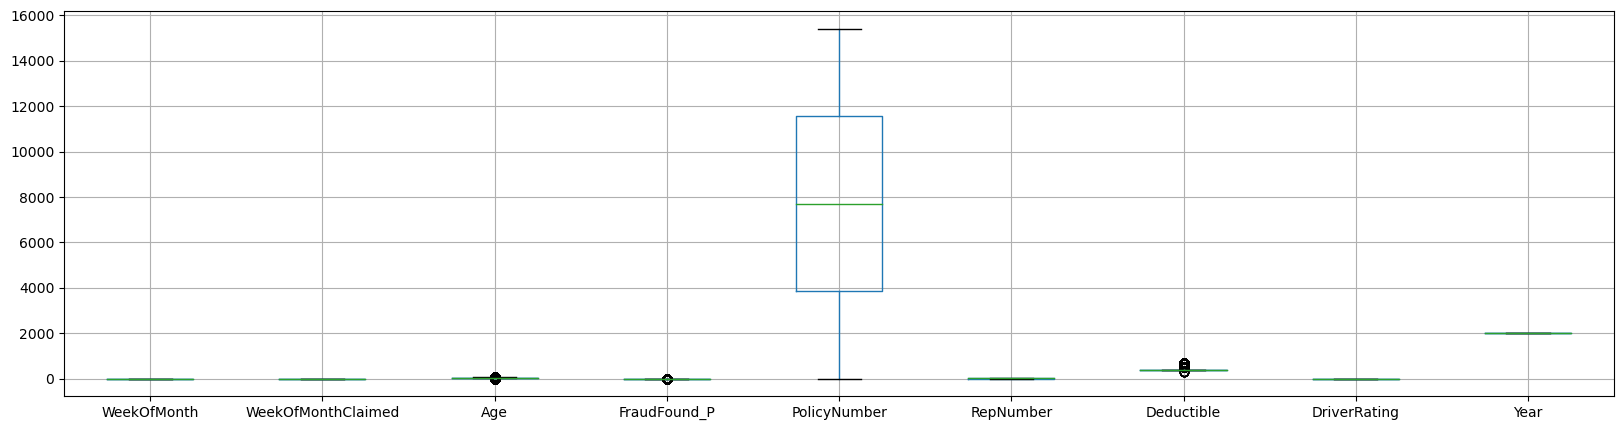

In [697]:
# Checking for outliers
plt.figure(figsize = (20,5))
df.boxplot()

# Feature Engineering

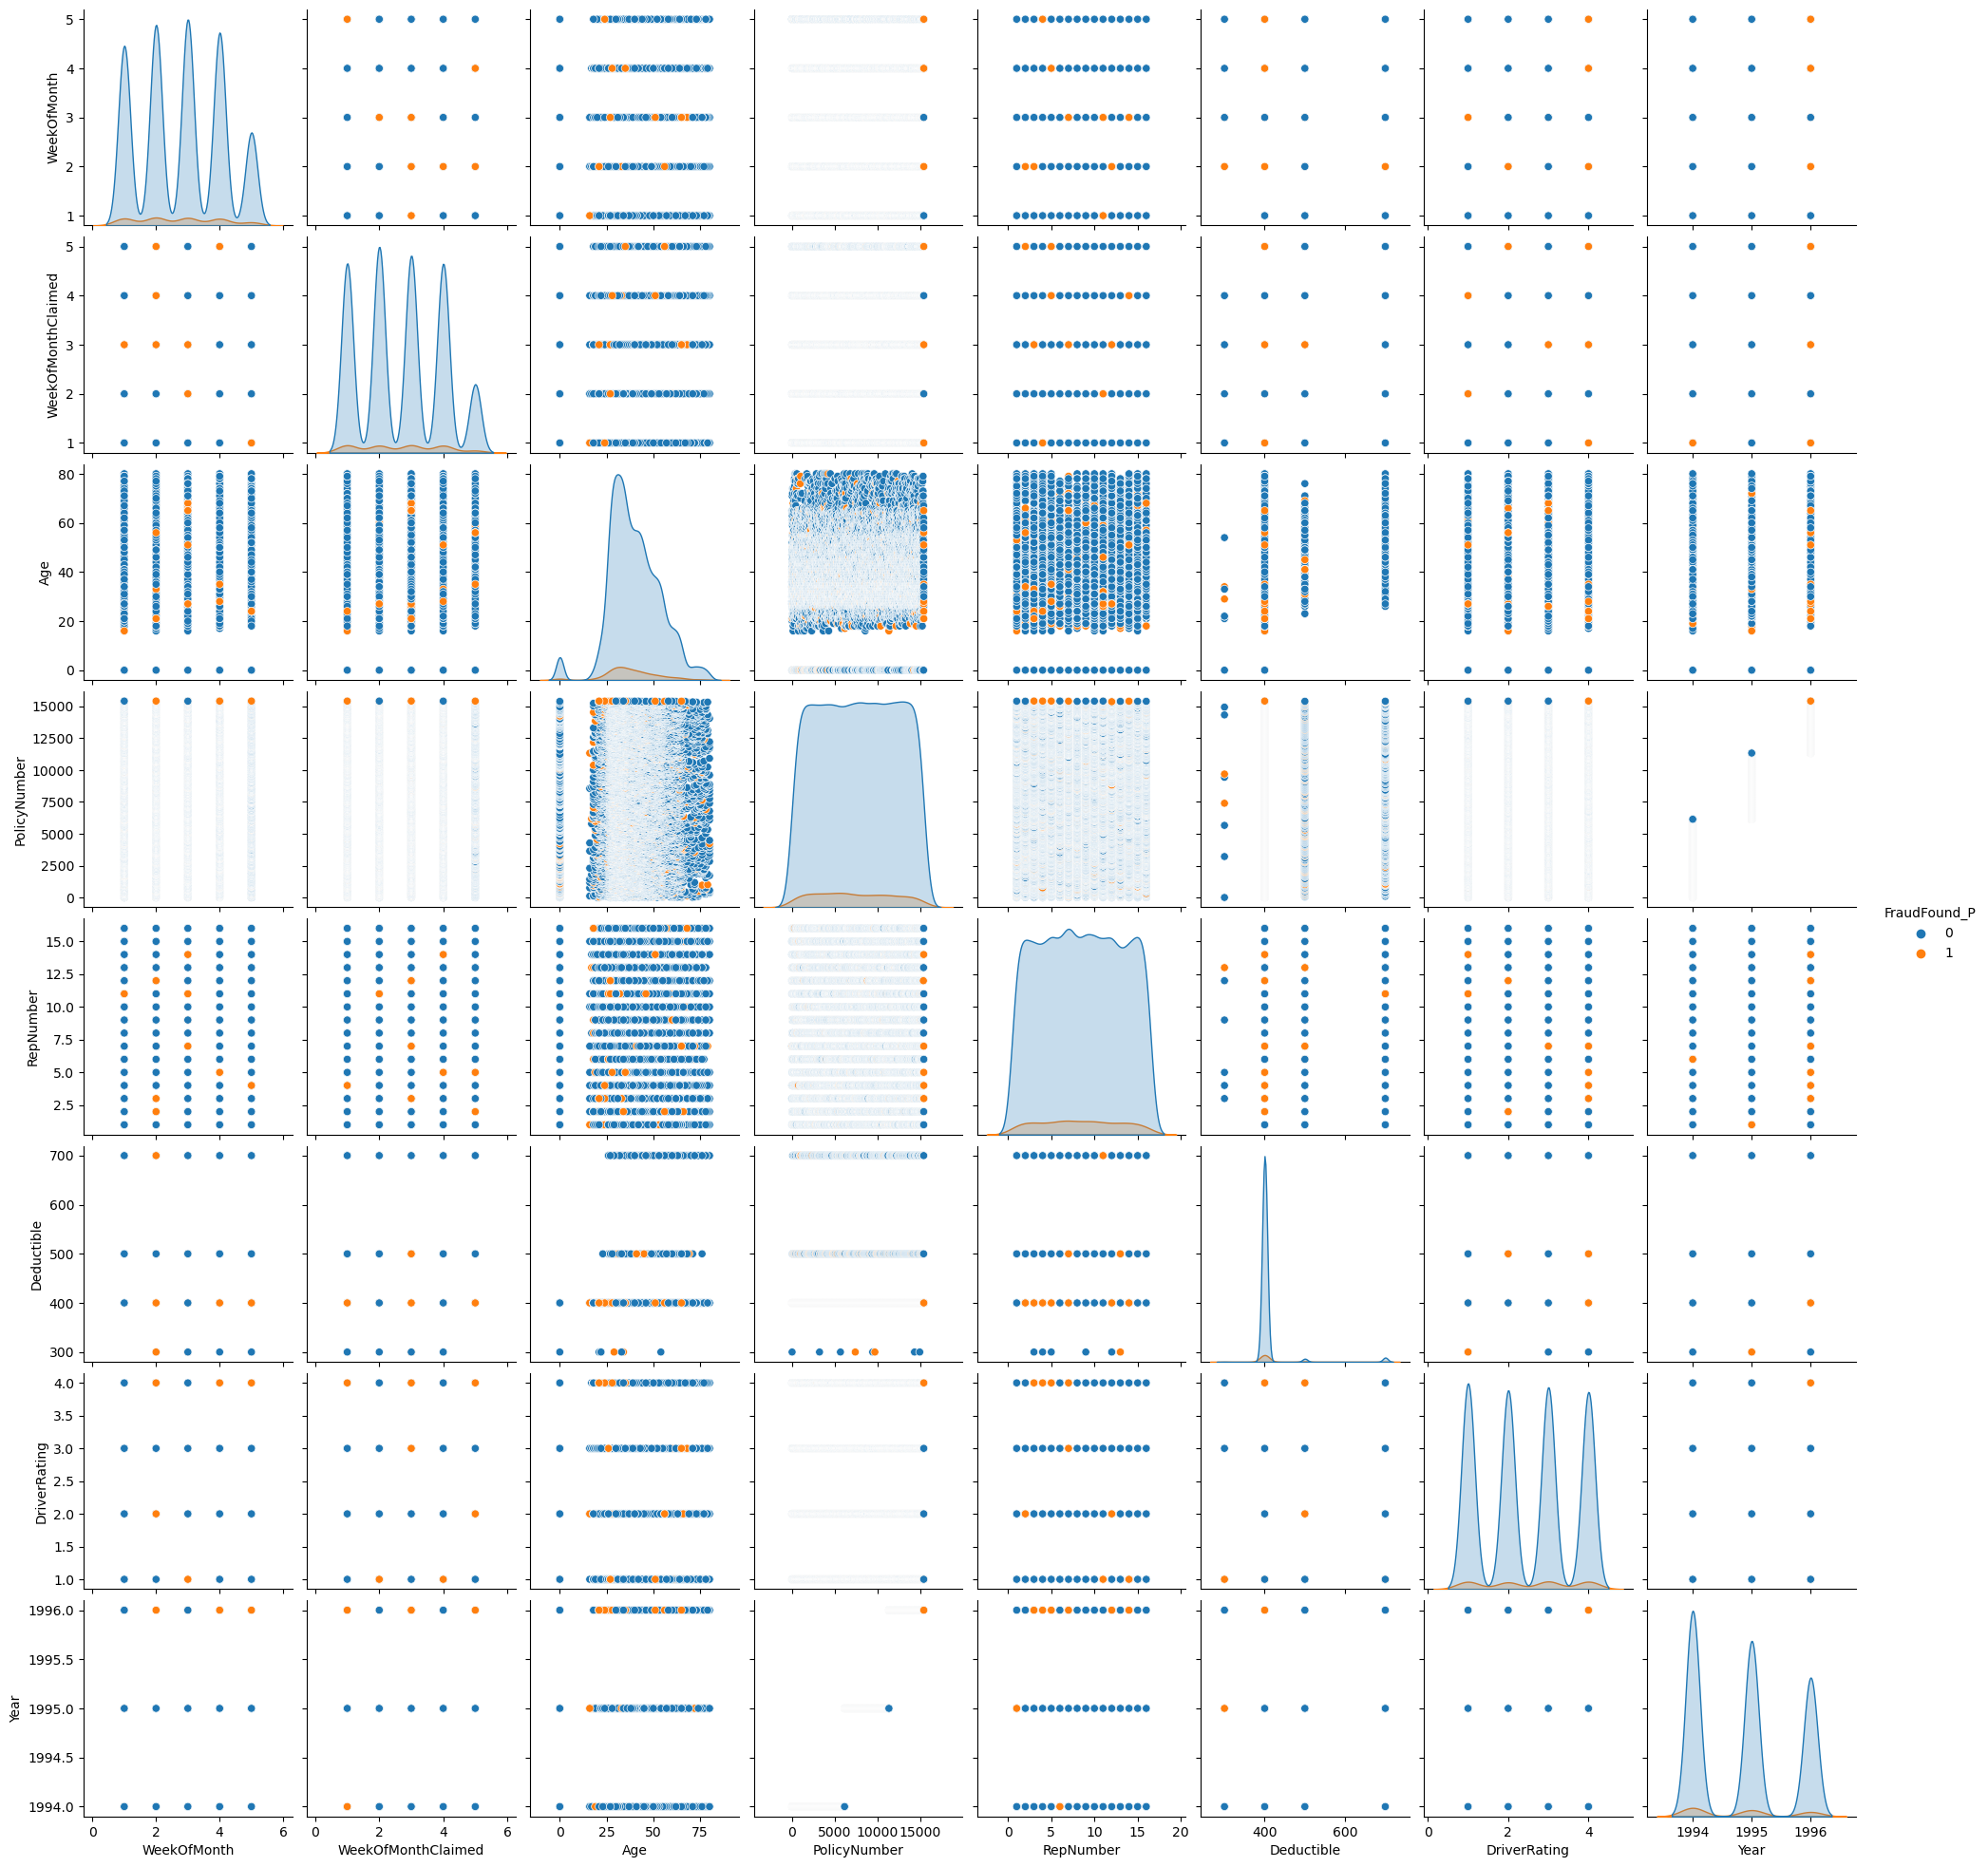

In [698]:
 sns.pairplot(df, hue = 'FraudFound_P')

In [699]:
### Replacing object data type into Numeric

In [700]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

### Month                 

In [701]:
df['Month'].value_counts()

Jan    1411
May    1367
Mar    1360
Jun    1321
Oct    1305
Dec    1285
Apr    1280
Feb    1266
Jul    1257
Sep    1240
Nov    1201
Aug    1127
Name: Month, dtype: int64

In [702]:
df = pd.get_dummies(df,columns=['Month'])

### DayOfWeek

In [703]:
df['DayOfWeek'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15420 entries, 0 to 15419
Series name: DayOfWeek
Non-Null Count  Dtype 
--------------  ----- 
15420 non-null  object
dtypes: object(1)
memory usage: 120.6+ KB


In [704]:
df['DayOfWeek'].value_counts()

Monday       2616
Friday       2445
Tuesday      2300
Thursday     2173
Wednesday    2159
Saturday     1982
Sunday       1745
Name: DayOfWeek, dtype: int64

In [705]:
df = pd.get_dummies(df,columns=['DayOfWeek'])

### Make

In [706]:
df['Make'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 15420 entries, 0 to 15419
Series name: Make
Non-Null Count  Dtype 
--------------  ----- 
15420 non-null  object
dtypes: object(1)
memory usage: 120.6+ KB


In [707]:
df['Make'].value_counts()

Pontiac      3837
Toyota       3121
Honda        2801
Mazda        2354
Chevrolet    1681
Accura        472
Ford          450
VW            283
Dodge         109
Saab          108
Mercury        83
Saturn         58
Nisson         30
BMW            15
Jaguar          6
Porche          5
Mecedes         4
Ferrari         2
Lexus           1
Name: Make, dtype: int64

In [708]:
df = pd.get_dummies(df,columns=['Make'])

In [709]:
# df.info()

### AccidentArea

In [710]:
df['AccidentArea'].value_counts()

Urban    13822
Rural     1598
Name: AccidentArea, dtype: int64

In [711]:
df['AccidentArea'].value_counts().to_dict()

{'Urban': 13822, 'Rural': 1598}

In [712]:
df['AccidentArea'].replace({'Urban': 1, 'Rural': 0}, inplace= True)

In [713]:
df['AccidentArea'].value_counts()

1    13822
0     1598
Name: AccidentArea, dtype: int64

In [714]:
AccidentArea_value = {'Urban': 1, 'Rural': 0}

### DayOfWeekClaimed

In [715]:
df['DayOfWeekClaimed'].value_counts()

Monday       3757
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
0               1
Name: DayOfWeekClaimed, dtype: int64

In [716]:
df['DayOfWeekClaimed'].replace({'0':'Monday'}, inplace = True)

In [717]:
df['DayOfWeekClaimed'].value_counts()

Monday       3758
Tuesday      3375
Wednesday    2951
Thursday     2660
Friday       2497
Saturday      127
Sunday         52
Name: DayOfWeekClaimed, dtype: int64

In [718]:
df = pd.get_dummies(df,columns=['DayOfWeekClaimed'])

### MonthClaimed

In [719]:
df['MonthClaimed'].value_counts()

Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
0         1
Name: MonthClaimed, dtype: int64

In [720]:
df = pd.get_dummies(df,columns=['MonthClaimed'])

### Sex

In [721]:
df['Sex'].value_counts()

Male      13000
Female     2420
Name: Sex, dtype: int64

In [722]:
df['Sex'].value_counts().to_dict()

{'Male': 13000, 'Female': 2420}

In [723]:
df['Sex'].replace({'Male': 1, 'Female': 0}, inplace= True)

In [724]:
df['Sex'].value_counts()

1    13000
0     2420
Name: Sex, dtype: int64

In [725]:
Sex_value = {'Male': 1, 'Female': 0}

### MaritalStatus

In [726]:
df['MaritalStatus'].value_counts()

Married     10625
Single       4684
Divorced       76
Widow          35
Name: MaritalStatus, dtype: int64

In [727]:
df['MaritalStatus'].value_counts().to_dict()

{'Married': 10625, 'Single': 4684, 'Divorced': 76, 'Widow': 35}

In [728]:
df['MaritalStatus'].replace({'Married': 0, 'Single': 1, 'Divorced': 3, 'Widow': 4}, inplace= True)

In [729]:
df['MaritalStatus'].value_counts()

0    10625
1     4684
3       76
4       35
Name: MaritalStatus, dtype: int64

In [730]:
MaritalStatus_value = {'Married': 0, 'Single': 1, 'Divorced': 3, 'Widow': 4}

### Fault

In [731]:
df['Fault'].value_counts()

Policy Holder    11230
Third Party       4190
Name: Fault, dtype: int64

In [732]:
df['Fault'].value_counts().to_dict()

{'Policy Holder': 11230, 'Third Party': 4190}

In [733]:
df['Fault'].replace({'Policy Holder': 1, 'Third Party': 0}, inplace= True)

In [734]:
df['Fault'].value_counts()

1    11230
0     4190
Name: Fault, dtype: int64

In [735]:
Fault_value = {'Policy Holder': 1, 'Third Party': 0}

### PolicyType

In [736]:
df['PolicyType'].value_counts()

Sedan - Collision       5584
Sedan - Liability       4987
Sedan - All Perils      4087
Sport - Collision        348
Utility - All Perils     340
Utility - Collision       30
Sport - All Perils        22
Utility - Liability       21
Sport - Liability          1
Name: PolicyType, dtype: int64

In [737]:
df['PolicyType'].value_counts().to_dict()

{'Sedan - Collision': 5584,
 'Sedan - Liability': 4987,
 'Sedan - All Perils': 4087,
 'Sport - Collision': 348,
 'Utility - All Perils': 340,
 'Utility - Collision': 30,
 'Sport - All Perils': 22,
 'Utility - Liability': 21,
 'Sport - Liability': 1}

In [738]:
df['PolicyType'].replace({'Sedan - Collision': 1,
                         'Sedan - Liability': 2,
                         'Sedan - All Perils': 3,
                         'Sport - Collision': 4,
                         'Utility - All Perils': 5,
                         'Utility - Collision': 6,
                         'Sport - All Perils': 7,
                         'Utility - Liability': 8,
                         'Sport - Liability': 9}, inplace= True)

In [739]:
df['PolicyType'].value_counts()

1    5584
2    4987
3    4087
4     348
5     340
6      30
7      22
8      21
9       1
Name: PolicyType, dtype: int64

In [740]:
PolicyType_value = {'Sedan - Collision': 1,
                         'Sedan - Liability': 2,
                         'Sedan - All Perils': 3,
                         'Sport - Collision': 4,
                         'Utility - All Perils': 5,
                         'Utility - Collision': 6,
                         'Sport - All Perils': 7,
                         'Utility - Liability': 8,
                         'Sport - Liability': 9}

### VehicleCategory

In [741]:
df['VehicleCategory'].value_counts()

Sedan      9671
Sport      5358
Utility     391
Name: VehicleCategory, dtype: int64

In [742]:
df['VehicleCategory'].value_counts().to_dict()

{'Sedan': 9671, 'Sport': 5358, 'Utility': 391}

In [743]:
df['VehicleCategory'].replace({'Sedan': 0, 'Sport': 1, 'Utility': 2}, inplace= True)

In [744]:
df['VehicleCategory'].value_counts()

0    9671
1    5358
2     391
Name: VehicleCategory, dtype: int64

In [745]:
VehicleCategory_value = {'Sedan': 0, 'Sport': 1, 'Utility': 2}

### Days_Policy_Accident

In [746]:
df['Days_Policy_Accident'].value_counts()

more than 30    15247
none               55
8 to 15            55
15 to 30           49
1 to 7             14
Name: Days_Policy_Accident, dtype: int64

###  Days_Policy_Claim

In [747]:
df['Days_Policy_Claim'].value_counts()

more than 30    15342
15 to 30           56
8 to 15            21
none                1
Name: Days_Policy_Claim, dtype: int64

In [748]:
df['Days_Policy_Claim'].value_counts().to_dict()

{'more than 30': 15342, '15 to 30': 56, '8 to 15': 21, 'none': 1}

In [749]:
df['Days_Policy_Claim'].replace({'more than 30': 30, '15 to 30': 15, '8 to 15': 8, 'none': 1}, inplace= True)

In [750]:
df['Days_Policy_Claim'].value_counts()

30    15342
15       56
8        21
1         1
Name: Days_Policy_Claim, dtype: int64

In [751]:
Days_Policy_Claim_value = {'more than 30': 30, '15 to 30': 15, '8 to 15': 8, 'none': 1}

### PoliceReportFiled

In [752]:
df['PoliceReportFiled'].value_counts()

No     14992
Yes      428
Name: PoliceReportFiled, dtype: int64

In [753]:
df['PoliceReportFiled'].value_counts().to_dict()

{'No': 14992, 'Yes': 428}

In [754]:
df['PoliceReportFiled'].replace({'No': 0, 'Yes': 1}, inplace= True)

In [755]:
df['PoliceReportFiled'].value_counts()

0    14992
1      428
Name: PoliceReportFiled, dtype: int64

In [756]:
PoliceReportFiled_value = {'No': 0, 'Yes': 1}

### WitnessPresent

In [757]:
df['WitnessPresent'].value_counts()

No     15333
Yes       87
Name: WitnessPresent, dtype: int64

In [758]:
df['WitnessPresent'].value_counts().to_dict()

{'No': 15333, 'Yes': 87}

In [759]:
df['WitnessPresent'].replace({'No': 0, 'Yes': 1}, inplace= True)

In [760]:
df['WitnessPresent'].value_counts()

0    15333
1       87
Name: WitnessPresent, dtype: int64

In [761]:
WitnessPresent_value = {'No': 0, 'Yes': 1}

### AgentType

In [762]:
df['AgentType'].value_counts()

External    15179
Internal      241
Name: AgentType, dtype: int64

In [763]:
df['AgentType'].value_counts().to_dict()

{'External': 15179, 'Internal': 241}

In [764]:
df['AgentType'].replace({'External': 0, 'Internal': 1}, inplace= True)

In [765]:
df['AgentType'].value_counts()

0    15179
1      241
Name: AgentType, dtype: int64

In [766]:
AgentType_value = {'External': 0, 'Internal': 1}

### NumberOfSuppliments

In [767]:
df['NumberOfSuppliments'].value_counts()

none           7047
more than 5    3867
1 to 2         2489
3 to 5         2017
Name: NumberOfSuppliments, dtype: int64

In [768]:
df['NumberOfSuppliments'].value_counts().to_dict()

{'none': 7047, 'more than 5': 3867, '1 to 2': 2489, '3 to 5': 2017}

In [769]:
df['NumberOfSuppliments'].replace({'none': 0, 'more than 5': 5, '1 to 2': 1, '3 to 5': 3}, inplace= True)

In [770]:
df['NumberOfSuppliments'].value_counts()

0    7047
5    3867
1    2489
3    2017
Name: NumberOfSuppliments, dtype: int64

In [771]:
NumberOfSuppliments_value = {'none': 0, 'more than 5': 5, '1 to 2': 1, '3 to 5': 3}

### AddressChange_Claim

In [772]:
df['AddressChange_Claim'].value_counts()

no change         14324
4 to 8 years        631
2 to 3 years        291
1 year              170
under 6 months        4
Name: AddressChange_Claim, dtype: int64

In [773]:
df['AddressChange_Claim'].value_counts().to_dict()

{'no change': 14324,
 '4 to 8 years': 631,
 '2 to 3 years': 291,
 '1 year': 170,
 'under 6 months': 4}

In [774]:
df['AddressChange_Claim'].replace({'no change': 0,'4 to 8 years': 4,'2 to 3 years': 2,'1 year': 1,'under 6 months': 6}, inplace= True)

In [775]:
df['AddressChange_Claim'].value_counts()

0    14324
4      631
2      291
1      170
6        4
Name: AddressChange_Claim, dtype: int64

In [776]:
AddressChange_Claim_value = {'no change': 0,'4 to 8 years': 4,'2 to 3 years': 2,'1 year': 1,'under 6 months': 6}

### NumberOfCars

In [777]:
df['NumberOfCars'].value_counts()

1 vehicle      14316
2 vehicles       709
3 to 4           372
5 to 8            21
more than 8        2
Name: NumberOfCars, dtype: int64

In [778]:
df['NumberOfCars'].value_counts().to_dict()

{'1 vehicle': 14316,
 '2 vehicles': 709,
 '3 to 4': 372,
 '5 to 8': 21,
 'more than 8': 2}

In [779]:
df['NumberOfCars'].replace({'1 vehicle': 1,'2 vehicles': 2,'3 to 4': 3,'5 to 8': 5,'more than 8': 8}, inplace= True)

In [780]:
df['NumberOfCars'].value_counts()

1    14316
2      709
3      372
5       21
8        2
Name: NumberOfCars, dtype: int64

In [781]:
NumberOfCars_value = {'1 vehicle': 1,'2 vehicles': 2,'3 to 4': 3,'5 to 8': 5,'more than 8': 8}

### BasePolicy  

In [782]:
df['BasePolicy'].value_counts()

Collision     5962
Liability     5009
All Perils    4449
Name: BasePolicy, dtype: int64

In [783]:
df['BasePolicy'].value_counts().to_dict()

{'Collision': 5962, 'Liability': 5009, 'All Perils': 4449}

In [784]:
df['BasePolicy'].replace({'Collision': 0, 'Liability': 1, 'All Perils': 2}, inplace= True)

In [785]:
df['BasePolicy'].value_counts()

0    5962
1    5009
2    4449
Name: BasePolicy, dtype: int64

In [786]:
BasePolicy_value = {'Collision': 0, 'Liability': 1, 'All Perils': 2}

### VehiclePrice

In [787]:
df['VehiclePrice'].value_counts()

20000 to 29000     8079
30000 to 39000     3533
more than 69000    2164
less than 20000    1096
40000 to 59000      461
60000 to 69000       87
Name: VehiclePrice, dtype: int64

In [788]:
df['VehiclePrice'].value_counts().to_dict()

{'20000 to 29000': 8079,
 '30000 to 39000': 3533,
 'more than 69000': 2164,
 'less than 20000': 1096,
 '40000 to 59000': 461,
 '60000 to 69000': 87}

In [789]:
df['VehiclePrice'].replace({'20000 to 29000': 2,'30000 to 39000': 3,'more than 69000': 7,'less than 20000': 1,
                            '40000 to 59000': 4,'60000 to 69000': 6}, inplace= True)

In [790]:
df['VehiclePrice'].value_counts()

2    8079
3    3533
7    2164
1    1096
4     461
6      87
Name: VehiclePrice, dtype: int64

In [791]:
VehiclePrice_value = {'20000 to 29000': 2,'30000 to 39000': 3,'more than 69000': 7,'less than 20000': 1,
                      '40000 to 59000': 4,'60000 to 69000': 6}

### Days_Policy_Accident

In [792]:
df['Days_Policy_Accident'].value_counts()

more than 30    15247
none               55
8 to 15            55
15 to 30           49
1 to 7             14
Name: Days_Policy_Accident, dtype: int64

In [793]:
df['Days_Policy_Accident'].value_counts().to_dict()

{'more than 30': 15247,
 'none': 55,
 '8 to 15': 55,
 '15 to 30': 49,
 '1 to 7': 14}

In [794]:
df['Days_Policy_Accident'].replace({'more than 30': 30,'none': 0,'8 to 15': 8,'15 to 30': 15,'1 to 7': 1}, inplace= True)

In [795]:
df['Days_Policy_Accident'].value_counts()

30    15247
0        55
8        55
15       49
1        14
Name: Days_Policy_Accident, dtype: int64

In [796]:
Days_Policy_Accident_value = {'more than 30': 30,'none': 0,'8 to 15': 8,'15 to 30': 15,'1 to 7': 1}

### PastNumberOfClaims

In [797]:
df['PastNumberOfClaims'].value_counts()

2 to 4         5485
none           4352
1              3573
more than 4    2010
Name: PastNumberOfClaims, dtype: int64

In [798]:
df['PastNumberOfClaims'].value_counts().to_dict()

{'2 to 4': 5485, 'none': 4352, '1': 3573, 'more than 4': 2010}

In [799]:
df['PastNumberOfClaims'].replace({'2 to 4': 2, 'none': 0, '1': 1, 'more than 4': 4}, inplace= True)

In [800]:
df['PastNumberOfClaims'].value_counts()

2    5485
0    4352
1    3573
4    2010
Name: PastNumberOfClaims, dtype: int64

In [801]:
PastNumberOfClaims_value = {'2 to 4': 2, 'none': 0, '1': 1, 'more than 4': 4}

### AgeOfVehicle

In [802]:
df['AgeOfVehicle'].value_counts()

7 years        5807
more than 7    3981
6 years        3448
5 years        1357
new             373
4 years         229
3 years         152
2 years          73
Name: AgeOfVehicle, dtype: int64

In [803]:
df['AgeOfVehicle'].value_counts().to_dict()

{'7 years': 5807,
 'more than 7': 3981,
 '6 years': 3448,
 '5 years': 1357,
 'new': 373,
 '4 years': 229,
 '3 years': 152,
 '2 years': 73}

In [804]:
df['AgeOfVehicle'].replace({'7 years': 7,'more than 7': 8,'6 years': 6,'5 years': 5,'new': 0,
                            '4 years': 4,'3 years': 3,'2 years': 2}, inplace= True)

In [805]:
df['AgeOfVehicle'].value_counts()

7    5807
8    3981
6    3448
5    1357
0     373
4     229
3     152
2      73
Name: AgeOfVehicle, dtype: int64

In [806]:
AgeOfVehicle_value = {'7 years': 7,'more than 7': 8,'6 years': 6,'5 years': 5,'new': 0,
                            '4 years': 4,'3 years': 3,'2 years': 2}

### AgeOfPolicyHolder                

In [807]:
df['AgeOfPolicyHolder'].value_counts()

31 to 35    5593
36 to 40    4043
41 to 50    2828
51 to 65    1392
26 to 30     613
over 65      508
16 to 17     320
21 to 25     108
18 to 20      15
Name: AgeOfPolicyHolder, dtype: int64

In [808]:
df['AgeOfPolicyHolder'].value_counts().to_dict()

{'31 to 35': 5593,
 '36 to 40': 4043,
 '41 to 50': 2828,
 '51 to 65': 1392,
 '26 to 30': 613,
 'over 65': 508,
 '16 to 17': 320,
 '21 to 25': 108,
 '18 to 20': 15}

In [809]:
df['AgeOfPolicyHolder'].replace({'31 to 35': 31,'36 to 40': 36,'41 to 50': 41,'51 to 65': 51,'26 to 30':16,
                                 'over 65': 65,'16 to 17': 16,'21 to 25': 21,'18 to 20': 18}, inplace= True)

In [810]:
df['AgeOfPolicyHolder'].value_counts()

31    5593
36    4043
41    2828
51    1392
16     933
65     508
21     108
18      15
Name: AgeOfPolicyHolder, dtype: int64

In [811]:
AgeOfPolicyHolder_value = {'31 to 35': 31,'36 to 40': 36,'41 to 50': 41,'51 to 65': 51,'26 to 30':16,
                                 'over 65': 65,'16 to 17': 16,'21 to 25': 21,'18 to 20': 18}

In [812]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 86 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   WeekOfMonth                 15420 non-null  int64
 1   AccidentArea                15420 non-null  int64
 2   WeekOfMonthClaimed          15420 non-null  int64
 3   Sex                         15420 non-null  int64
 4   MaritalStatus               15420 non-null  int64
 5   Age                         15420 non-null  int64
 6   Fault                       15420 non-null  int64
 7   PolicyType                  15420 non-null  int64
 8   VehicleCategory             15420 non-null  int64
 9   VehiclePrice                15420 non-null  int64
 10  FraudFound_P                15420 non-null  int64
 11  PolicyNumber                15420 non-null  int64
 12  RepNumber                   15420 non-null  int64
 13  Deductible                  15420 non-null  int64
 14  Driver

# Feature Selection

# Model Building

In [813]:
# Train-Test Split

x = df.drop('FraudFound_P', axis = 1)
y = df['FraudFound_P']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, stratify= y, random_state=5)

print("Training data size : ", x_train.shape)
print("Testing data size : ", x_test.shape)

Training data size :  (10794, 85)
Testing data size :  (4626, 85)


In [814]:
model_details = []
Testing_accuracy = []
Training_accuracy = []
best_params_list = []

In [815]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
model_details.append("Logistic Regression")

In [816]:
def model_evalution_testing(logistic_model, x_test, y_test):
    
    # Testing Data Evaluation
    y_pred = logistic_model.predict(x_test)

    cnf_matrix = confusion_matrix(y_pred, y_test)
    print("Confusion Matrix:\n",cnf_matrix)

    print("*"*84)

    accuracy = accuracy_score(y_pred, y_test)
    print("Accuracy Score", accuracy)

   # We are appending testing accuracy in list
    Testing_accuracy.append(accuracy)
    print("*"*84)

    clf_report = classification_report(y_pred, y_test)
    print("Classification report:\n",clf_report)

In [817]:
def model_evalution_training(logistic_model, x_train, y_train):
    # Training Data Evaluation
    y_pred_train = logistic_model.predict(x_train)

    cnf_matrix = confusion_matrix(y_pred_train, y_train)
    print("Confusion Matrix:\n",cnf_matrix)

    print("*"*84)

    accuracy = accuracy_score(y_pred_train, y_train)
    print("Accuracy Score", accuracy)
# We are appending training accuracy in list
    Training_accuracy.append(accuracy)

    print("*"*84)

    clf_report = classification_report(y_pred_train, y_train)
    print("Classification report:\n",clf_report)

In [818]:
model_evalution_training(logistic_model, x_train, y_train)

Confusion Matrix:
 [[10148   646]
 [    0     0]]
************************************************************************************
Accuracy Score 0.9401519362608857
************************************************************************************
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     10794
           1       0.00      0.00      0.00         0

    accuracy                           0.94     10794
   macro avg       0.50      0.47      0.48     10794
weighted avg       1.00      0.94      0.97     10794



In [819]:
model_evalution_testing(logistic_model, x_test, y_test)

Confusion Matrix:
 [[4349  277]
 [   0    0]]
************************************************************************************
Accuracy Score 0.9401210549070471
************************************************************************************
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      4626
           1       0.00      0.00      0.00         0

    accuracy                           0.94      4626
   macro avg       0.50      0.47      0.48      4626
weighted avg       1.00      0.94      0.97      4626



In [820]:
## Checking Accuracy using Decision Tree Algorithm

In [821]:
dt_model = DecisionTreeClassifier(random_state= 5)
dt_model.fit(x_train, y_train)
model_details.append("Decision Tree Classifier")

In [822]:
model_evalution_training(dt_model, x_train, y_train)

Confusion Matrix:
 [[10148     0]
 [    0   646]]
************************************************************************************
Accuracy Score 1.0
************************************************************************************
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10148
           1       1.00      1.00      1.00       646

    accuracy                           1.00     10794
   macro avg       1.00      1.00      1.00     10794
weighted avg       1.00      1.00      1.00     10794



In [823]:
model_evalution_testing(dt_model, x_test, y_test)

Confusion Matrix:
 [[4135  198]
 [ 214   79]]
************************************************************************************
Accuracy Score 0.9109381755296152
************************************************************************************
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      4333
           1       0.29      0.27      0.28       293

    accuracy                           0.91      4626
   macro avg       0.62      0.61      0.61      4626
weighted avg       0.91      0.91      0.91      4626



In [824]:
## Hyper Parameter Tunning for Decision Tree Model
dt_model = DecisionTreeClassifier()
param_grid = {'criterion':['gini', 'entropy'],
                'max_depth' :np.arange(3,8),
                'min_samples_split' : np.arange(2,20),
               'min_samples_leaf' :np.arange(2,15)}

gscv_dt_model =  RandomizedSearchCV(dt_model, param_grid, cv=5)
gscv_dt_model.fit(x_train, y_train)
gscv_dt_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=8,
                       min_samples_split=4)

In [825]:
gscv_dt_model = gscv_dt_model.best_estimator_
gscv_dt_model.fit(x_train, y_train)
model_details.append("Decision Tree Classifier with Hyper parameter tunning")

In [826]:
model_evalution_training(gscv_dt_model, x_train, y_train)

Confusion Matrix:
 [[10139   596]
 [    9    50]]
************************************************************************************
Accuracy Score 0.9439503427830276
************************************************************************************
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     10735
           1       0.08      0.85      0.14        59

    accuracy                           0.94     10794
   macro avg       0.54      0.90      0.56     10794
weighted avg       0.99      0.94      0.97     10794



In [827]:
model_evalution_testing(gscv_dt_model, x_test, y_test)

Confusion Matrix:
 [[4345  260]
 [   4   17]]
************************************************************************************
Accuracy Score 0.9429312581063554
************************************************************************************
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      4605
           1       0.06      0.81      0.11        21

    accuracy                           0.94      4626
   macro avg       0.53      0.88      0.54      4626
weighted avg       0.99      0.94      0.97      4626



In [828]:
# Prunning

In [829]:
result = dt_model.cost_complexity_pruning_path(x_train, y_train)
ccp_alpha_list = result['ccp_alphas']
ccp_alpha_list

array([0.00000000e+00, 5.88216264e-05, 6.01790485e-05, 6.10764554e-05,
       6.11292440e-05, 6.22722328e-05, 7.21648479e-05, 7.33272933e-05,
       7.80930211e-05, 7.86316348e-05, 7.93081232e-05, 8.23502769e-05,
       8.28920550e-05, 8.42218741e-05, 8.49237231e-05, 8.49237231e-05,
       8.55175952e-05, 8.66670253e-05, 8.66670253e-05, 8.68538077e-05,
       8.68538077e-05, 8.70292699e-05, 8.70976078e-05, 8.71944108e-05,
       8.71944108e-05, 8.77680583e-05, 8.77680583e-05, 8.77680583e-05,
       8.80118584e-05, 8.84329678e-05, 8.87838923e-05, 8.93742711e-05,
       8.99192362e-05, 9.00706154e-05, 9.03962110e-05, 9.05853046e-05,
       9.05853046e-05, 9.06444541e-05, 9.06517161e-05, 9.08095256e-05,
       9.12613143e-05, 9.15278680e-05, 9.17357864e-05, 9.23563470e-05,
       9.25682480e-05, 9.25909094e-05, 9.26440615e-05, 9.26440615e-05,
       9.26440615e-05, 9.26440615e-05, 9.26440615e-05, 9.26440615e-05,
       9.33203041e-05, 9.40222703e-05, 9.56067497e-05, 9.98198335e-05,
      

In [830]:
train_accuracy_list = []
test_accuracy_list = []

for i in ccp_alpha_list:
    decision_tree_model = DecisionTreeClassifier(ccp_alpha=i, random_state=11)
    decision_tree_model.fit(x_train, y_train)
    
    training_accuracy = decision_tree_model.score(x_train, y_train)
    train_accuracy_list.append(training_accuracy)
    
    testing_accuracy = decision_tree_model.score(x_test, y_test)
    test_accuracy_list.append(testing_accuracy)

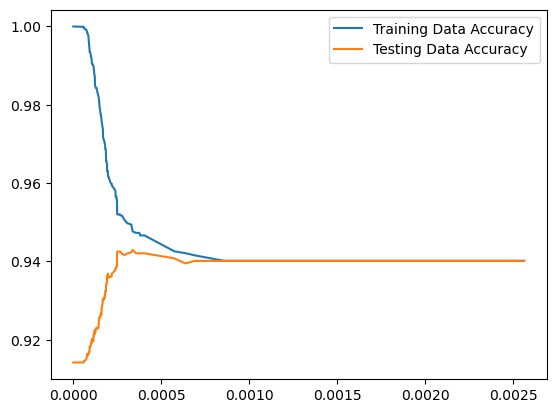

In [831]:
fig, ax = plt.subplots()
ax.plot(ccp_alpha_list, train_accuracy_list, label = "Training Data Accuracy")
ax.plot(ccp_alpha_list, test_accuracy_list, label = "Testing Data Accuracy")
ax.legend()


In [832]:
max_test = test_accuracy_list.index(max(test_accuracy_list))
max_test

221

In [833]:
best_ccp = ccp_alpha_list[max_test]
best_ccp

0.0003373195912529357

In [834]:
dt_prunning_model = DecisionTreeClassifier(ccp_alpha= best_ccp, random_state=11)
dt_prunning_model.fit(x_train, y_train)
model_details.append("Decision Tree with Prunnung")

In [835]:
model_evalution_training(dt_prunning_model, x_train, y_train)

Confusion Matrix:
 [[10123   540]
 [   25   106]]
************************************************************************************
Accuracy Score 0.9476561052436538
************************************************************************************
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     10663
           1       0.16      0.81      0.27       131

    accuracy                           0.95     10794
   macro avg       0.58      0.88      0.62     10794
weighted avg       0.99      0.95      0.96     10794



In [836]:
model_evalution_testing(dt_prunning_model, x_test, y_test)

Confusion Matrix:
 [[4328  243]
 [  21   34]]
************************************************************************************
Accuracy Score 0.9429312581063554
************************************************************************************
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      4571
           1       0.12      0.62      0.20        55

    accuracy                           0.94      4626
   macro avg       0.56      0.78      0.59      4626
weighted avg       0.98      0.94      0.96      4626



In [837]:
rf_model = RandomForestClassifier(random_state=12)
rf_model.fit(x_train, y_train)
model_details.append("Random Forest Classifier")

In [838]:
model_evalution_training(rf_model, x_train, y_train)

Confusion Matrix:
 [[10148     0]
 [    0   646]]
************************************************************************************
Accuracy Score 1.0
************************************************************************************
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10148
           1       1.00      1.00      1.00       646

    accuracy                           1.00     10794
   macro avg       1.00      1.00      1.00     10794
weighted avg       1.00      1.00      1.00     10794



In [839]:
model_evalution_testing(rf_model, x_test, y_test)

Confusion Matrix:
 [[4348  275]
 [   1    2]]
************************************************************************************
Accuracy Score 0.940337224383917
************************************************************************************
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      4623
           1       0.01      0.67      0.01         3

    accuracy                           0.94      4626
   macro avg       0.50      0.80      0.49      4626
weighted avg       1.00      0.94      0.97      4626



In [840]:
# Hyper-parameter tunning for random forest

rf_model = RandomForestClassifier(random_state=12)

param_grid = {'criterion':['gini', 'entropy'],
              'n_estimators': np.arange(50,200),
                'max_depth' :np.arange(3,8),
                'min_samples_split' : np.arange(2,20),
               'min_samples_leaf' :np.arange(2,15),
              'oob_score': [False, True]}

rscv_rf_model =  RandomizedSearchCV(rf_model, param_grid, cv=5)
rscv_rf_model.fit(x_train, y_train)
rscv_rf_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_leaf=2,
                       min_samples_split=11, n_estimators=72, random_state=12)

In [841]:
rscv_rf_model = rscv_rf_model.best_estimator_
rscv_rf_model.fit(x_train, y_train)
model_details.append("DT with RandmizedSearchCV")

In [842]:
model_evalution_training(rscv_rf_model, x_train, y_train)

Confusion Matrix:
 [[10148   646]
 [    0     0]]
************************************************************************************
Accuracy Score 0.9401519362608857
************************************************************************************
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     10794
           1       0.00      0.00      0.00         0

    accuracy                           0.94     10794
   macro avg       0.50      0.47      0.48     10794
weighted avg       1.00      0.94      0.97     10794



In [843]:
model_evalution_testing(rscv_rf_model, x_test, y_test)

Confusion Matrix:
 [[4349  277]
 [   0    0]]
************************************************************************************
Accuracy Score 0.9401210549070471
************************************************************************************
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      4626
           1       0.00      0.00      0.00         0

    accuracy                           0.94      4626
   macro avg       0.50      0.47      0.48      4626
weighted avg       1.00      0.94      0.97      4626



In [844]:
adb_model = AdaBoostClassifier(random_state= 14)
adb_model.fit(x_train, y_train)
model_details.append("Adaboost Model")

In [845]:
model_evalution_training(adb_model, x_train, y_train)

Confusion Matrix:
 [[10094   634]
 [   54    12]]
************************************************************************************
Accuracy Score 0.9362608856772281
************************************************************************************
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97     10728
           1       0.02      0.18      0.03        66

    accuracy                           0.94     10794
   macro avg       0.51      0.56      0.50     10794
weighted avg       0.99      0.94      0.96     10794



In [846]:
model_evalution_testing(adb_model, x_test, y_test)

Confusion Matrix:
 [[4324  272]
 [  25    5]]
************************************************************************************
Accuracy Score 0.9357976653696498
************************************************************************************
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.94      0.97      4596
           1       0.02      0.17      0.03        30

    accuracy                           0.94      4626
   macro avg       0.51      0.55      0.50      4626
weighted avg       0.99      0.94      0.96      4626



In [847]:
# Hyper-parameter tunning for Adaboost by using RandomizedSearchCv

adb_model = AdaBoostClassifier(random_state=12)

param_grid = {"n_estimators":np.arange(30, 100),
            "learning_rate": np.arange(0,2,0.001)}

rscv_adb_model =  RandomizedSearchCV(adb_model, param_grid, cv=5, n_jobs= -1)
rscv_adb_model.fit(x_train, y_train)
rscv_adb_model.best_estimator_

AdaBoostClassifier(learning_rate=0.14, n_estimators=85, random_state=12)

In [848]:
rscv_adb_model = rscv_adb_model.best_estimator_
rscv_adb_model.fit(x_train, y_train)
model_details.append("Adaboost with RandomizedSearchCV")

In [849]:
model_evalution_training(rscv_adb_model, x_train, y_train)

Confusion Matrix:
 [[10148   646]
 [    0     0]]
************************************************************************************
Accuracy Score 0.9401519362608857
************************************************************************************
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     10794
           1       0.00      0.00      0.00         0

    accuracy                           0.94     10794
   macro avg       0.50      0.47      0.48     10794
weighted avg       1.00      0.94      0.97     10794



In [850]:
model_evalution_testing(rscv_adb_model, x_test, y_test)

Confusion Matrix:
 [[4349  277]
 [   0    0]]
************************************************************************************
Accuracy Score 0.9401210549070471
************************************************************************************
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      4626
           1       0.00      0.00      0.00         0

    accuracy                           0.94      4626
   macro avg       0.50      0.47      0.48      4626
weighted avg       1.00      0.94      0.97      4626



In [851]:
# Hyper-parameter tunning for Adaboost by using RandomizedSearchCv

adb_model = AdaBoostClassifier(random_state=12)

param_grid = {"n_estimators":np.arange(30, 100),
            "learning_rate": np.arange(0,2,0.001)}

rscv_adb_model =  RandomizedSearchCV(adb_model, param_grid, cv=5, n_jobs= -1)
rscv_adb_model.fit(x_train, y_train)
rscv_adb_model.best_estimator_

AdaBoostClassifier(learning_rate=0.363, n_estimators=57, random_state=12)

In [852]:
rscv_adb_model = rscv_adb_model.best_estimator_
rscv_adb_model.fit(x_train, y_train)
model_details.append("Adaboost with GridSearchCV")

In [853]:
model_evalution_training(rscv_adb_model, x_train, y_train)

Confusion Matrix:
 [[10126   641]
 [   22     5]]
************************************************************************************
Accuracy Score 0.9385769872151195
************************************************************************************
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     10767
           1       0.01      0.19      0.01        27

    accuracy                           0.94     10794
   macro avg       0.50      0.56      0.49     10794
weighted avg       1.00      0.94      0.97     10794



In [854]:
model_evalution_testing(rscv_adb_model, x_test, y_test)

Confusion Matrix:
 [[4340  276]
 [   9    1]]
************************************************************************************
Accuracy Score 0.9383916990920882
************************************************************************************
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      4616
           1       0.00      0.10      0.01        10

    accuracy                           0.94      4626
   macro avg       0.50      0.52      0.49      4626
weighted avg       1.00      0.94      0.97      4626



In [869]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=11)
rf_model.fit(x,y)

RandomForestClassifier(random_state=11)

In [870]:
rf_model.feature_importances_

array([3.56478121e-02, 1.04218863e-02, 3.36596034e-02, 8.03697162e-03,
       1.34566445e-02, 6.48458437e-02, 2.85457256e-02, 1.93619521e-02,
       1.47457698e-02, 2.73985982e-02, 9.71397185e-02, 5.75992275e-02,
       1.05216003e-02, 3.31080071e-02, 3.53378368e-03, 2.13146601e-03,
       2.93418809e-02, 3.13010910e-02, 2.83455079e-02, 3.04300539e-03,
       1.02112165e-03, 7.82465967e-04, 2.64447437e-02, 1.32601291e-02,
       9.46861883e-03, 2.29241503e-02, 1.55434872e-02, 7.17070641e-03,
       6.89255954e-03, 5.72233366e-03, 7.31947016e-03, 7.34950279e-03,
       5.35237733e-03, 6.90209041e-03, 7.96581665e-03, 7.78418275e-03,
       4.37568262e-03, 6.11617841e-03, 6.50204829e-03, 1.02712975e-02,
       1.11761962e-02, 9.72203937e-03, 9.26672010e-03, 9.22366376e-03,
       9.16768590e-03, 8.80773506e-03, 6.62699987e-03, 4.21377267e-04,
       8.10786863e-03, 4.87845288e-04, 1.27447117e-05, 4.35928165e-03,
       9.69855593e-03, 0.00000000e+00, 1.13124807e-07, 9.81876216e-03,
      

<AxesSubplot:>

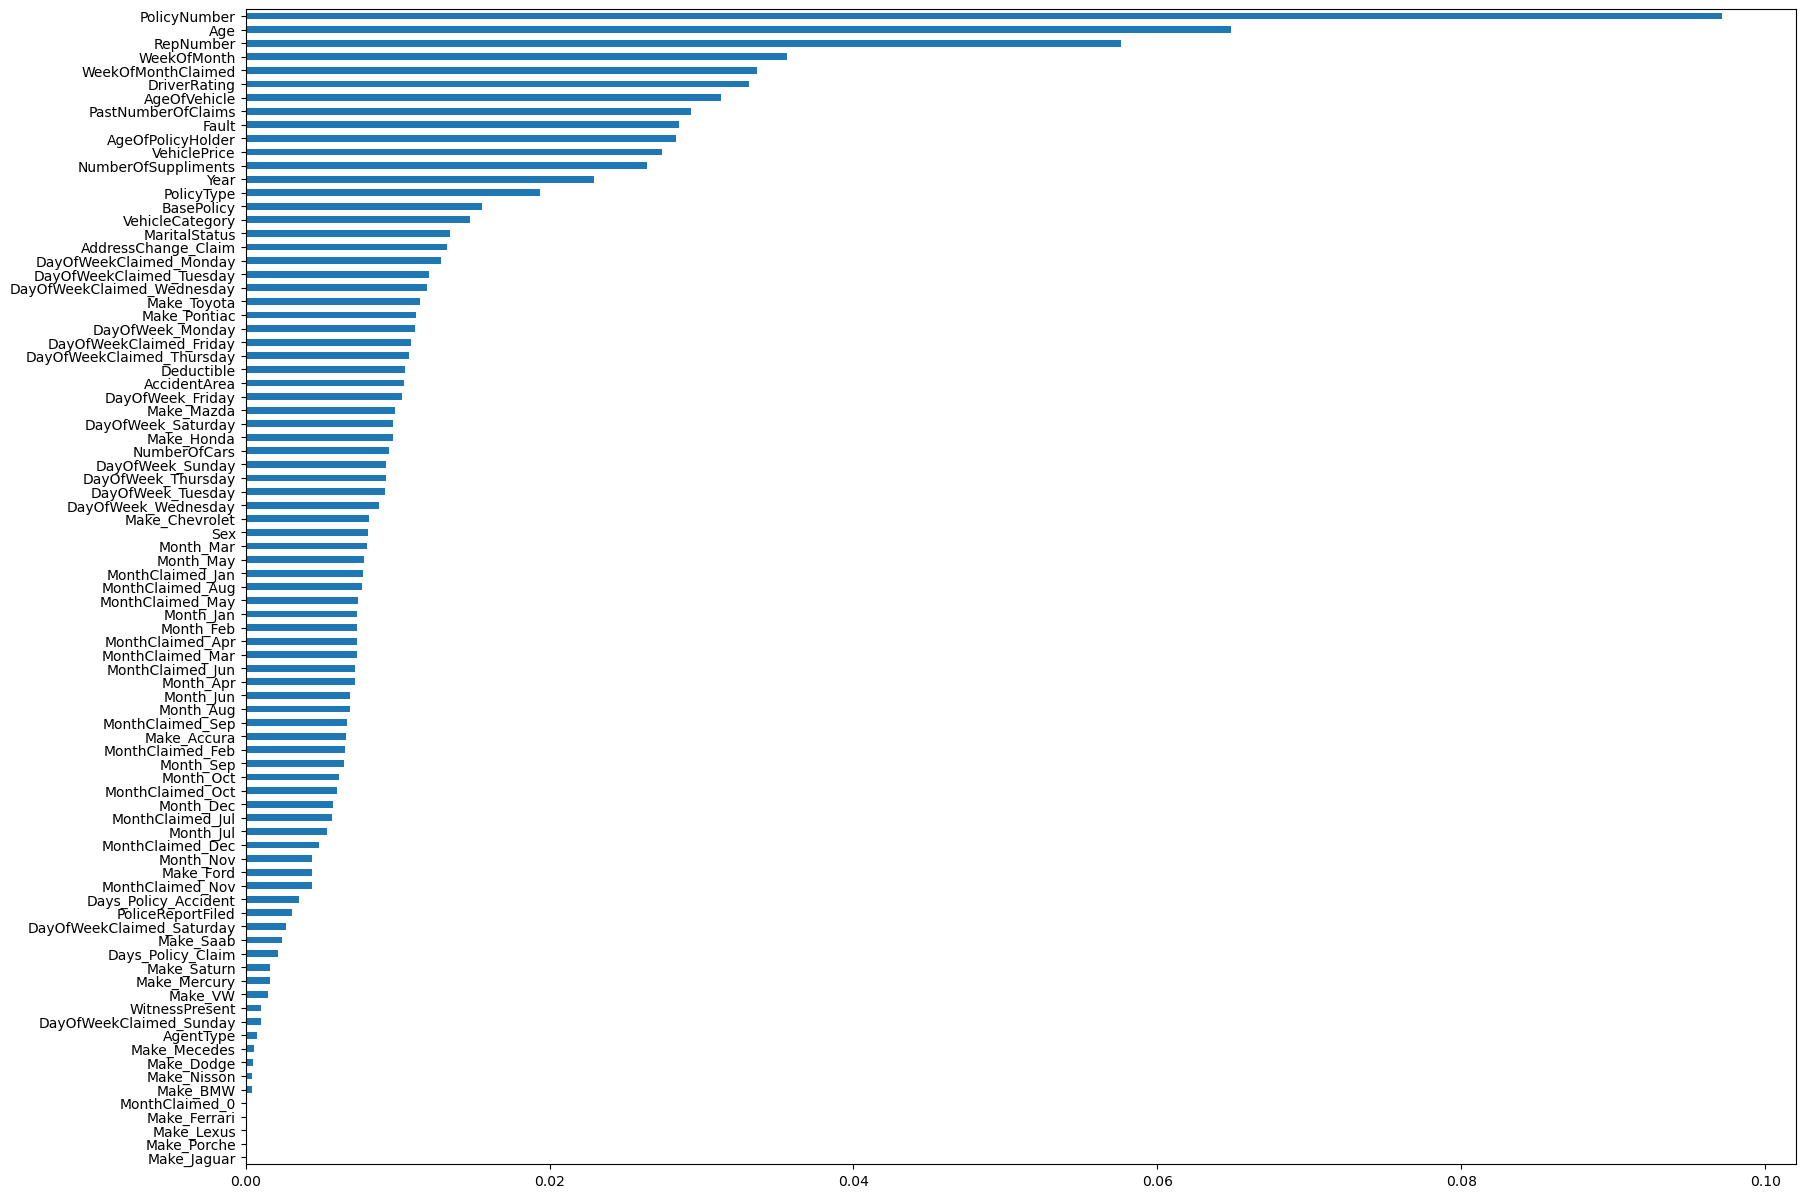

In [874]:
plt.figure(figsize=(20,15))
s6 = pd.Series(rf_model.feature_importances_, index=x.columns)
s6.sort_values().plot(kind = 'barh')

In [868]:
comparison_df = pd.DataFrame({"Model_details":model_details, "Training_accuracy":Training_accuracy,
                              "Testing_accuracy":Testing_accuracy})
comparison_df

,Model_details,Training_accuracy,Testing_accuracy
0,Logistic Regression,0.940152,0.940121
1,Decision Tree Classifier,1.000000,0.910938
2,Decision Tree Classifier with Hyper parameter ...,0.943950,0.942931
3,Decision Tree with Prunnung,0.947656,0.942931
4,Random Forest Classifier,1.000000,0.940337
5,DT with RandmizedSearchCV,0.940152,0.940121
6,Adaboost Model,0.936261,0.935798
7,Adaboost with RandomizedSearchCV,0.940152,0.940121
8,Adaboost with GridSearchCV,0.938577,0.938392


### Create JSON File

In [856]:
json_data = {'AccidentArea': AccidentArea_value,
             'Sex':Sex_value,
             'MaritalStatus':MaritalStatus_value,
             'Fault':Fault_value,
             'VehicleCategory':VehicleCategory_value,
             'Days_Policy_Claim':Days_Policy_Claim_value,
             'PoliceReportFiled':PoliceReportFiled_value,
             'WitnessPresent':WitnessPresent_value,
             'AgentType':AgentType_value,
             'NumberOfSuppliments':NumberOfSuppliments_value,
             'AddressChange_Claim':AddressChange_Claim_value,
             'NumberOfCars':NumberOfCars_value,
             'VehiclePrice':VehiclePrice_value,
             'Days_Policy_Accident':Days_Policy_Accident_value,
             'PastNumberOfClaims':PastNumberOfClaims_value,
             'AgeOfVehicle':AgeOfVehicle_value,
             'AgeOfPolicyHolder':AgeOfPolicyHolder_value,
             'BasePolicy':BasePolicy_value,
             'PolicyType':PolicyType_value,
             'columns':list(x.columns)}

json_data

{'AccidentArea': {'Urban': 1, 'Rural': 0},
 'Sex': {'Male': 1, 'Female': 0},
 'MaritalStatus': {'Married': 0, 'Single': 1, 'Divorced': 3, 'Widow': 4},
 'Fault': {'Policy Holder': 1, 'Third Party': 0},
 'VehicleCategory': {'Sedan': 0, 'Sport': 1, 'Utility': 2},
 'Days_Policy_Claim': {'more than 30': 30,
  '15 to 30': 15,
  '8 to 15': 8,
  'none': 1},
 'PoliceReportFiled': {'No': 0, 'Yes': 1},
 'WitnessPresent': {'No': 0, 'Yes': 1},
 'AgentType': {'External': 0, 'Internal': 1},
 'NumberOfSuppliments': {'none': 0,
  'more than 5': 5,
  '1 to 2': 1,
  '3 to 5': 3},
 'AddressChange_Claim': {'no change': 0,
  '4 to 8 years': 4,
  '2 to 3 years': 2,
  '1 year': 1,
  'under 6 months': 6},
 'NumberOfCars': {'1 vehicle': 1,
  '2 vehicles': 2,
  '3 to 4': 3,
  '5 to 8': 5,
  'more than 8': 8},
 'VehiclePrice': {'20000 to 29000': 2,
  '30000 to 39000': 3,
  'more than 69000': 7,
  'less than 20000': 1,
  '40000 to 59000': 4,
  '60000 to 69000': 6},
 'Days_Policy_Accident': {'more than 30': 30,
  '

In [857]:
with open ("project_data.json", 'w') as f:
    json.dump(json_data,f)

### Create Pickle File

In [858]:
with open("Decision Tree_Prunnung.pkl", "wb") as f:
    pickle.dump(dt_prunning_model, f)

### Testing for User Input Values

In [859]:
column_names = x.columns
column_names

Index(['WeekOfMonth', 'AccidentArea', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'PolicyNumber', 'RepNumber', 'Deductible',
       'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim',
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy', 'Month_Apr', 'Month_Aug', 'Month_Dec', 'Month_Feb',
       'Month_Jan', 'Month_Jul', 'Month_Jun', 'Month_Mar', 'Month_May',
       'Month_Nov', 'Month_Oct', 'Month_Sep', 'DayOfWeek_Friday',
       'DayOfWeek_Monday', 'DayOfWeek_Saturday', 'DayOfWeek_Sunday',
       'DayOfWeek_Thursday', 'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday',
       'Make_Accura', 'Make_BMW', 'Make_Chevrolet', 'Make_Dodge',
       'Make_Ferrari', 'Make_Ford', 'Make_Honda', 'Make_Jaguar', 'Make_Lexus',
       'Make_Mazda', 'Make

In [860]:
WeekOfMonth = 1
AccidentArea = 'Urban'
WeekOfMonthClaimed = 2
Sex = 'Male'
MaritalStatus = 'Single'
Age = 21
Fault = 'Policy Holder'
VehicleCategory = 'Sport' 
VehiclePrice = 'more than 69000'
PolicyNumber = 1
RepNumber = 1
Deductible = 3000
DriverRating = 2
Days_Policy_Accident = 'more than 30'
Days_Policy_Claim = 'more than 30'
PastNumberOfClaims =  'none'
AgeOfVehicle = '3 years'
AgeOfPolicyHolder = '26 to 30'
PoliceReportFiled = 'No'
WitnessPresent = 'No'
AgentType = 'External'
NumberOfSuppliments = 'none' 
AddressChange_Claim = '1 year'
NumberOfCars = '3 to 4'
Year = 1994
PolicyType = 'Sport - Liability'
BasePolicy = 'Collision'

# onehot encoded columns

Month_inp = 'Dec'
DayOfWeek_inp = 'Wednesday'
Make_inp = 'Honda'
DayOfWeekClaimed_inp = 'Tuesday'
MonthClaimed_inp = 'Jan' 

In [861]:
len(x.columns)

85

In [862]:
test_array = np.zeros(len(x.columns), dtype = int)
(test_array)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [863]:
Month_col = 'Month_'+ Month_inp
DayOfWeek_col = 'DayOfWeek_'+ DayOfWeek_inp
Make_col = 'Make_' + Make_inp
DayOfWeekClaimed_col = 'DayOfWeekClaimed_'+ DayOfWeekClaimed_inp
MonthClaimed_col = 'MonthClaimed_'+ MonthClaimed_inp


print(Make_col)
print(Month_col)
print(DayOfWeek_col)
print(DayOfWeekClaimed_col)
print(MonthClaimed_col)

Make_Honda
Month_Dec
DayOfWeek_Wednesday
DayOfWeekClaimed_Tuesday
MonthClaimed_Jan


In [864]:
# Find the index of this column -->

Month_index = np.where(column_names == Month_col)[0][0]
DayOfWeek_index = np.where(column_names == DayOfWeek_col)[0][0]
Make_index = np.where(column_names == Make_col)[0][0]
DayOfWeekClaimed_index = np.where(column_names == DayOfWeekClaimed_col)[0][0]
MonthClaimed_index = np.where(column_names == MonthClaimed_col)[0][0]

In [881]:
test_array[0] = WeekOfMonth
test_array[1] = json_data['AccidentArea'][AccidentArea]
test_array[2] = WeekOfMonthClaimed
test_array[3] = json_data['Sex'][Sex]
test_array[4] = json_data['MaritalStatus'][MaritalStatus]
test_array[5] = Age
test_array[6] = json_data['Fault'][Fault]
test_array[7] = json_data['PolicyType'][PolicyType]
test_array[8] = json_data['VehicleCategory'][VehicleCategory]
test_array[9] = json_data['VehiclePrice'][VehiclePrice]
test_array[10] = PolicyNumber
test_array[11] = RepNumber
test_array[12] = Deductible
test_array[13] = DriverRating
test_array[14] = json_data['Days_Policy_Accident'][Days_Policy_Accident]
test_array[15] = json_data['Days_Policy_Claim'][Days_Policy_Claim]
test_array[16] = json_data['PastNumberOfClaims'][PastNumberOfClaims]
test_array[17] = json_data['AgeOfVehicle'][AgeOfVehicle]
test_array[18] = json_data['AgeOfPolicyHolder'][AgeOfPolicyHolder]
test_array[19] = json_data['PoliceReportFiled'][PoliceReportFiled]
test_array[20] = json_data['WitnessPresent'][WitnessPresent]
test_array[21] = json_data['AgentType'][AgentType]
test_array[22] = json_data['NumberOfSuppliments'][NumberOfSuppliments]
test_array[23] = json_data['AddressChange_Claim'][AddressChange_Claim]
test_array[24] = json_data['NumberOfCars'][NumberOfCars]
test_array[25] = Year
test_array[26]= json_data['BasePolicy'][BasePolicy]


test_array[Month_index] = 1
test_array[DayOfWeek_index] = 1
test_array[Make_index] = 1
test_array[DayOfWeekClaimed_index] = 1
test_array[MonthClaimed_index] = 1
test_array

array([   1,    1,    2,    1,    1,   21,    1,    9,    1,    7,    1,
          1, 3000,    2,   30,   30,    0,    3,   16,    0,    0,    0,
          0,    1,    3, 1994,    0,    0,    0,    1,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    1,    0,    0,    0,    0,    0,    0,    1,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    1,    0,    0,    0,    0,    0,    0,
          1,    0,    0,    0,    0,    0,    0,    0])

In [878]:
x.head(1)

,WeekOfMonth,AccidentArea,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,...,MonthClaimed_Dec,MonthClaimed_Feb,MonthClaimed_Jan,MonthClaimed_Jul,MonthClaimed_Jun,MonthClaimed_Mar,MonthClaimed_May,MonthClaimed_Nov,MonthClaimed_Oct,MonthClaimed_Sep
0,5,1,1,0,1,21,1,9,1,7,...,0,0,1,0,0,0,0,0,0,0


In [882]:
charges = dt_prunning_model.predict([test_array])[0]
charges

1

In [883]:
if charges == 1:
    print("Fraud Insurance Claim Detected")
else:
    print('No Fraud found')

Fraud Insurance Claim Detected
